In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
import cv2

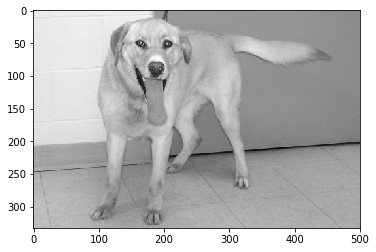

In [3]:
datadir = '/home/ap_tech/Documents/Tensorflow_CNN/PetImages/'
categories = ['Dog', 'Cat']

for category in categories:
    path = os.path.join(datadir, category)  # path to cats or dogs dir 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [4]:
print(img_array.shape)

(333, 500)


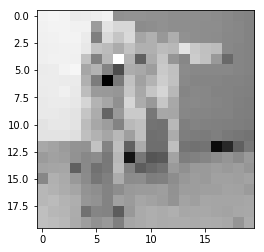

In [5]:
# Resizing the images

IMG_SIZE = 20 

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
# Training Data

training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)  # path to cats or dogs dir 
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [7]:
print(len(training_data))

24946


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
1
1
0
1
1
0


In [10]:
x = []
y = []

In [ ]:
for features, label in training_data:
    x.append(features)
    y.append(np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1))

In [ ]:
import pickle 

pickle_out = open('x.pickle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()


In [39]:
pickle_in = open('x.pickle', 'rb')
x = pickle.load(pickle_in)

In [45]:
x[1]

In [43]:
!free -h 

              total        used        free      shared  buff/cache   available
Mem:           15Gi       8.7Gi       3.5Gi       1.6Gi       3.1Gi       4.5Gi
Swap:            0B          0B          0B


# ConvNet 

In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [2]:
x = pickle.load(open("x.pickle" , "rb"))
y = pickle.load(open("y.pickle" , "rb"))

x = x/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x,y, batch_size=32, epochs=10, validation_splite=0.1)

TypeError: unsupported operand type(s) for /: 'list' and 'float'